In [111]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
import itertools


In [113]:
# Load the data
df = pd.read_csv('demand1 (1).csv')

In [114]:
df

,timestamp,region,city,item_id,demand,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1-2-2018,region_1,city_2,item_1,148,NaN,NaN,NaN,NaN,NaN
1,1-3-2018,region_1,city_2,item_1,124,NaN,NaN,NaN,NaN,NaN
2,1-4-2018,region_1,city_2,item_1,243,NaN,NaN,NaN,NaN,NaN
3,1-5-2018,region_1,city_2,item_1,199,NaN,NaN,NaN,NaN,NaN
4,1-6-2018,region_1,city_2,item_1,100,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13459,5-1-2024,region_2,city_1,item_2,2986,NaN,NaN,NaN,NaN,NaN
13460,5-2-2024,region_2,city_1,item_2,2742,NaN,NaN,NaN,NaN,NaN
13461,5-3-2024,region_2,city_1,item_2,1722,NaN,NaN,NaN,NaN,NaN
13462,5-4-2024,region_2,city_1,item_2,542,NaN,NaN,NaN,NaN,NaN


In [115]:
df = df.drop(columns=['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'])


In [116]:
df

,timestamp,region,city,item_id,demand
0,1-2-2018,region_1,city_2,item_1,148
1,1-3-2018,region_1,city_2,item_1,124
2,1-4-2018,region_1,city_2,item_1,243
3,1-5-2018,region_1,city_2,item_1,199
4,1-6-2018,region_1,city_2,item_1,100
...,...,...,...,...,...
13459,5-1-2024,region_2,city_1,item_2,2986
13460,5-2-2024,region_2,city_1,item_2,2742
13461,5-3-2024,region_2,city_1,item_2,1722
13462,5-4-2024,region_2,city_1,item_2,542


In [117]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [118]:
# Check for duplicate indices
duplicate_dates = df.index[df.index.duplicated()]
print("Duplicate indices:", duplicate_dates)


Duplicate indices: DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09',
               '2018-01-10', '2018-01-11',
               ...
               '2024-04-26', '2024-04-27', '2024-04-28', '2024-04-29',
               '2024-04-30', '2024-05-01', '2024-05-02', '2024-05-03',
               '2024-05-04', '2024-05-05'],
              dtype='datetime64[ns]', name='timestamp', length=11148, freq=None)


In [119]:
df = df.groupby(df.index).sum()


In [120]:
#Check for Stationarity with the ADF Test to make sure that statistical properties do not change with time.
result = adfuller(df['demand'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.2881524763198207
p-value: 0.17581750899768156


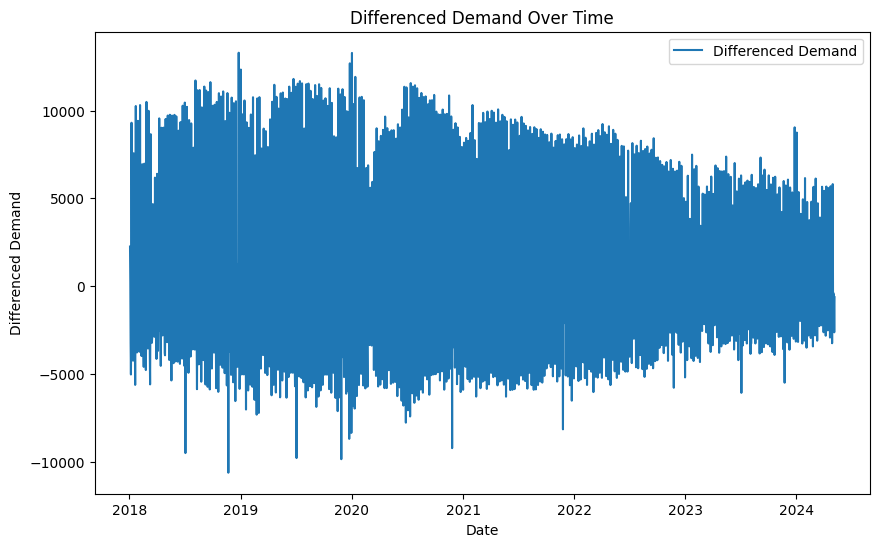

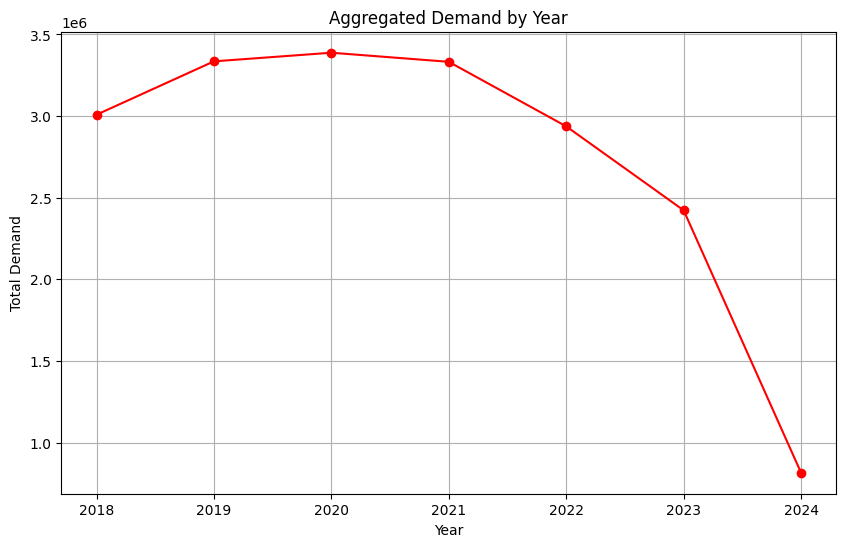

In [121]:
#Differencing the data cause it's non-stationary
if result[1] > 0.05:
    df['demand_diff'] = df['demand'].diff().dropna()
    plt.figure(figsize=(10, 6))
    plt.plot(df['demand_diff'], label='Differenced Demand')
    plt.title('Differenced Demand Over Time')
    plt.xlabel('Date')
    plt.ylabel('Differenced Demand')
    plt.legend()
    plt.show()
else:
    df['demand_diff'] = df['demand']

# Step 5: Resample the data to yearly frequency and sum the demand
df_yearly = df['demand'].resample('Y').sum()

# Step 6: Plot the aggregated demand by year
plt.figure(figsize=(10, 6))
plt.plot(df_yearly.index.year, df_yearly, marker='o', linestyle='-', color='r')
plt.title('Aggregated Demand by Year')
plt.xlabel('Year')
plt.ylabel('Total Demand')
plt.grid(True)
plt.show()

In [122]:
# Perform the ADF test on the differenced series
adf_test_result = adfuller(df['demand_diff'].dropna())

# Extract and print the test statistics
print(f'ADF Statistic: {adf_test_result[0]}')
print(f'p-value: {adf_test_result[1]}')
print(f'Critical Values:')
for key, value in adf_test_result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -15.081585057499053
p-value: 8.439374951109222e-28
Critical Values:
	1%: -3.4332125513481744
	5%: -2.86280460821553
	10%: -2.5674432086780112


<ipython-input-123-7c7f1e6999e9>:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[0].stem(acf_vals, use_line_collection=True)
<ipython-input-123-7c7f1e6999e9>:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1].stem(pacf_vals, use_line_collection=True)


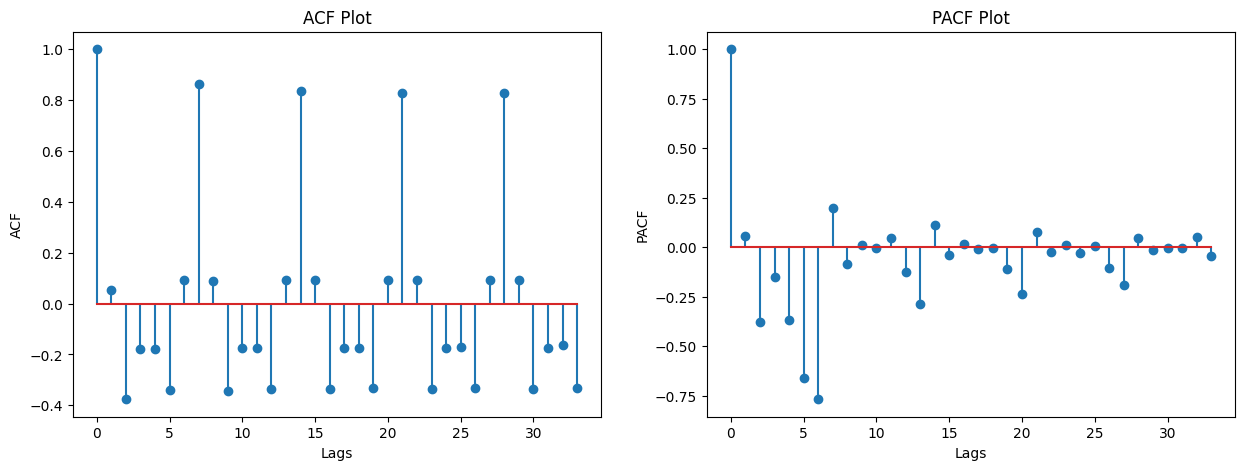

In [123]:
# Step 4: ACF and PACF plots for determining p, q, P, Q
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
acf_vals = acf(df['demand_diff'].dropna())
pacf_vals = pacf(df['demand_diff'].dropna())

axes[0].stem(acf_vals, use_line_collection=True)
axes[0].set_title('ACF Plot')
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('ACF')

axes[1].stem(pacf_vals, use_line_collection=True)
axes[1].set_title('PACF Plot')
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('PACF')

plt.show()


In [ ]:
#range of p, d, q, P, D, Q
#p = d = q = P = D = Q = range(0, 3)
#m = 7  #As data has daily observations

# Generating all different combinations of p, d, q, P, D, Q
#pdq = list(itertools.product(p, d, q))
#seasonal_pdq = list(itertools.product(P, D, Q, [m]))

# Initializing variables to store the best model
#best_aic = float("inf")
#best_pdq = None
#best_seasonal_pdq = None
#best_model = None

# Iterate over all parameter combinations
#for param in pdq:
#    for seasonal_param in seasonal_pdq:
#        try:
#            # Fit the SARIMA model
#            model = SARIMAX(df['demand'], order=param, seasonal_order=seasonal_param)
#            results = model.fit(disp=False)

            # Check if this model has the best (lowest) AIC
#            if results.aic < best_aic:
#               best_aic = results.aic
#                best_pdq = param
#                best_seasonal_pdq = seasonal_param
#                best_model = results
#        except:
#            continue


In [ ]:
# Print out the best parameters
#print(f'Best SARIMA model: ARIMA{best_pdq}x{best_seasonal_pdq} - AIC:{best_aic}')

In [124]:
# Fit a SARIMA model
#model = SARIMAX(df['demand'], order=(p, d, q), seasonal_order=(P, D, Q, m))
model = SARIMAX(df['demand'], order=(0,1,0), seasonal_order=(1,0,0,7))
results = model.fit()

# Make 7-day and 14-day forecasts
forecast_7d = results.get_forecast(steps=7).predicted_mean
forecast_14d = results.get_forecast(steps=14).predicted_mean

print("7-Day Forecast:", forecast_7d)
print("14-Day Forecast:", forecast_14d)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


7-Day Forecast: 2024-05-06    8447.168514
2024-05-07    7823.326718
2024-05-08    7456.614736
2024-05-09    7100.256974
2024-05-10    6338.358902
2024-05-11    4064.744610
2024-05-12    3519.422321
Freq: D, Name: predicted_mean, dtype: float64
14-Day Forecast: 2024-05-06    8447.168514
2024-05-07    7823.326718
2024-05-08    7456.614736
2024-05-09    7100.256974
2024-05-10    6338.358902
2024-05-11    4064.744610
2024-05-12    3519.422321
2024-05-13    7845.043414
2024-05-14    7306.760445
2024-05-15    6990.342379
2024-05-16    6682.858470
2024-05-17    6025.453405
2024-05-18    4063.661395
2024-05-19    3593.129117
Freq: D, Name: predicted_mean, dtype: float64
